<a href="https://colab.research.google.com/github/jcallaghan2020/Human-Genome-Analysis/blob/main/isolation_forest_testing2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statistics as stat
from pandas import DataFrame as df, Series
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew
from __future__ import division
import seaborn as sns
sns.set(style='ticks', palette='Set2')
%matplotlib inline


# import scikit-allel
!pip install scikit-allel
import allel
# check which version is installed
print(allel.__version__)


import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

#this is the 2nd file, to run this code you need to upload the file to your drive and change the name to match ( CEU22.gt.snps.poly.nomissing (1) ),
#or change the code to what yours is named
test_sample = allel.read_vcf('/content/drive/MyDrive/CEU22.gt.snps.poly.nomissing (1).vcf.gz')
gt_test = allel.GenotypeArray(test_sample['calldata/GT'])
het_count = gt_test.count_het()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
1.3.5
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.ensemble import IsolationForest
#trying to do mean
mean_lst = []
f_het_rate_lst = []
count = 0
hom_rate = 0
het_rate = 0
hom_rate2 = 0
het_rate2 = 0

#calc mean rate for individual sections
#het = different allele values (1/0 or 0/1), hom = same allele values (0/0 or 1/1)
for i in gt_test[0:]:
  i_lst = i.tolist()
  for n in i_lst:
    if n == [0, 0] or n == [1, 1]:
      count = count + 1
      hom_rate = hom_rate + 1
    if n == [1, 0] or n == [0, 1]:
      count = count + 1
      het_rate = het_rate + 1
    if count == 10000:    #divide into sections of 100 samples (size might need to change)
      f_het_rate = het_rate / (het_rate + hom_rate) #calculate ratio of heterozygous alleles
      f_het_rate_lst.append(f_het_rate) #add ratio to list
      hom_rate = 0
      het_rate = 0
      f_het_rate = 0
      count = 0
      mean = stat.mean(f_het_rate_lst)
      mean_lst.append(mean)
      f_het_rate_lst = []
      mean = 0
      

In [ ]:
mean_arr = np.array(mean_lst)
mean_arr = mean_arr.reshape(-1, 1)
n = int(len(mean_arr) / 10)
model=IsolationForest(n_estimators= n , max_samples='auto', contamination=float(0.05),max_features=1.0)
model.fit(mean_arr)
len(mean_arr)

1740

In [ ]:
anomaly_score = model.decision_function(mean_arr)
anomaly_decision = model.predict(mean_arr)


In [ ]:
# filter outlier index
from numpy import where
outlier_index = where(anomaly_decision == -1) 
# these are values where an outlier was predicted. An anomalous region should be where multiple outliers are near each other.
outlier_index

(array([  14,   15,   55,   81,  186,  262,  267,  276,  281,  283,  293,
         294,  295,  324,  325,  347,  370,  375,  390,  394,  417,  436,
         453,  466,  467,  468,  469,  470,  471,  472,  626,  632,  695,
         736,  741,  743,  749,  761,  766,  772,  773,  774,  821,  829,
         840,  877,  886,  887,  888,  916,  921,  928,  929,  958,  964,
         965,  966,  969,  970,  977,  978,  980,  981, 1031, 1050, 1091,
        1106, 1107, 1117, 1122, 1181, 1205, 1231, 1252, 1268, 1334, 1349,
        1350, 1354, 1355, 1401, 1467, 1472, 1500, 1595, 1620, 1628]),)

In [ ]:
#returns regions where 3 straight outliers are predicted. Should return areas in the mid to late 80s.
for i in range(len(anomaly_decision)-2):
  
    # checking the conditions
    if anomaly_decision[i] == anomaly_decision[i + 1] and anomaly_decision[i + 1] == anomaly_decision[i + 2] and anomaly_decision[i] == -1:
  
        # printing the element as the 
        # conditions are satisfied 
        print('Anomalous regions found: ',i, i+1, i+2)

Anomalous regions found:  293 294 295
Anomalous regions found:  466 467 468
Anomalous regions found:  467 468 469
Anomalous regions found:  468 469 470
Anomalous regions found:  469 470 471
Anomalous regions found:  470 471 472
Anomalous regions found:  772 773 774
Anomalous regions found:  886 887 888
Anomalous regions found:  964 965 966


In [ ]:
#returns regions where 3 straight outliers are predicted. (this loop is for plotting only anomalies)
for i in range(len(anomaly_decision)-2):
  
    # checking the conditions
    if anomaly_decision[i] == anomaly_decision[i + 1] and anomaly_decision[i + 1] == anomaly_decision[i + 2] and anomaly_decision[i] == -1:
  
        # printing the element as the 
        # conditions are satisfied 
        print('Anomalous regions found: ', i, i+1, i+2)

    else:
      anomaly_decision[i] = 1

Anomalous regions found:  293 294 295
Anomalous regions found:  466 467 468
Anomalous regions found:  467 468 469
Anomalous regions found:  468 469 470
Anomalous regions found:  469 470 471
Anomalous regions found:  470 471 472
Anomalous regions found:  772 773 774
Anomalous regions found:  886 887 888
Anomalous regions found:  964 965 966


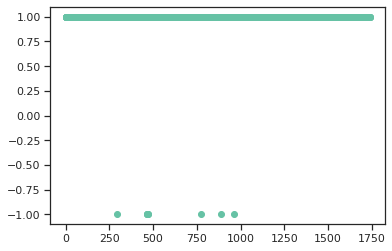

In [ ]:
x = range(len(anomaly_decision))
plt.scatter(x, anomaly_decision)
plt.show()